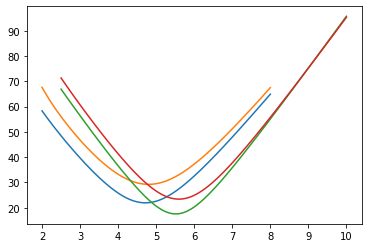

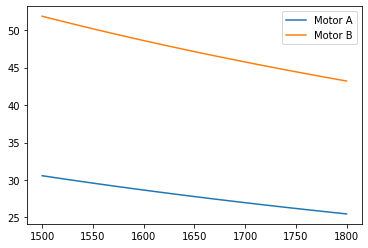

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

motores = {
    "A": {
        "vt": 208,
        "p_nom": 45 * 746,
        "lig": "d",
        "fp": 0.8,
        "tipo_fp": "cap",
        "if_nom": 4,
        "n": .8173,
        "xs": 2.5,
        "polos": 4,
        "f": 60
    },
    "B": {
        "vt": 250,
        "p_nom": 60 * 746,
        "lig": "d",
        "fp": 0.85,
        "tipo_fp": "cap",
        "if_nom": 5,
        "n": .85,
        "xs": 2.2,
        "polos": 4,
        "f": 60
    }
}

cargas = {
    "1": {
        "p": 15 * 746,
        "fp": .85,
        "tipo_fp": "ind"
    },
    "2": {
        "p": 20 * 746,
        "fp": .88,
        "tipo_fp": "ind"
    }
}

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()

# Cálculo EA para a carga
for tag in motores:
    for tag2 in cargas:
        carga = cargas[tag2]
        motor = motores[tag]

        ia = (carga["p"]/motor["n"])/(3*motor["vt"]*carga["fp"])
        ang = -1 * math.acos(carga["fp"]) if carga["tipo_fp"] == "ind" else math.acos(carga["fp"])
        ea = motor["vt"] - 1j * motor["xs"] * cmath.rect(ia, ang)

        # Determinando a curva V
        if_v = np.linspace(motor["if_nom"]/2, 2*motor["if_nom"], 100)
        k_v = abs(ea) / motor["if_nom"]
        ea_v_mod = if_v * k_v
        ea_ang_v = np.array([math.asin(abs(ea)*math.sin(cmath.phase(ea))/x) for x in ea_v_mod])

        ea_v = []

        for i in range(len(ea_v_mod)):
            mod = ea_v_mod[i]
            ang = ea_ang_v[i]
            ea_v.append(cmath.rect(mod, ang))

        ea_v = np.array(ea_v)

        ia_v = (motor["vt"] - ea_v) / (1j * motor["xs"])

        ax.plot(if_v, abs(ia_v), label="Motor {} - Carga {}".format(tag, tag2))
       
    # Determinando a curva de potência
    delta_w = np.linspace(1500,60*motor["f"]*2/motor["polos"], 100)
    t_max = (3 * motor["vt"] * ea) / (delta_w * 1j * motor["xs"])
    
    ax2.plot(delta_w, abs(t_max), label="Motor {}".format(tag))

plt.legend()
plt.show()